source：https://github.com/AlexLynd/ESP8266-Wardriving

the dataset: gathered the data by walking around with WiGLE, exported to csv

the task: filter data by different criteria, plot on the map

In [ ]:
import numpy as np
import pandas as pd
import folium
from folium import Map, Marker
import random
import matplotlib.pyplot as plt
color_list = ['black', 'darkblue', 'cadetblue', 'pink', 'darkred', 'white', 'orange', 'purple', 'lightblue', 'darkpurple', 'gray', 'red', 'lightgray', 'lightred', 'green', 'darkgreen', 'beige', 'lightgreen', 'blue']
from tqdm import tqdm
import time

In [ ]:
def importdataset():
    global wd
    wd = pd.read_csv ('WigleWifi_20210906181508.csv', skiprows=1) 
    print(f"total devices: {len(wd)}") # number of detected devices

# explore and clean the data

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
wd["MAC"].value_counts()

In [ ]:
#take a look how many unique valid MACs are there and how many entries in total
wd.loc[(wd['MAC'].str.len() == 17)]["MAC"].describe()

In [ ]:
print(f"number of unique APs: {len(wd['MAC'].unique())}")

In [ ]:
pd.DataFrame (wd['MAC'].unique())

In [ ]:
pd.DataFrame (wd.loc[(wd['MAC'].str.len() == 17)]["MAC"])

# plot all WCDMA towers

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
# drop all else except WCDMA
wd = pd.DataFrame( wd.loc[wd['Type'] == "WCDMA"] )
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd['MAC'].value_counts()

In [ ]:
#color code different MACs
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['MAC'] == wd['MAC'][index],"Color"] = random.choice(color_list)

In [ ]:
pd.DataFrame (wd, columns=['Color','MAC']).value_counts()

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# folium.PolyLine(wd[['CurrentLatitude', 'CurrentLongitude']].values.tolist(),line_opacity = 0.5, weight = 4).add_to(basic_map) # plot route

# add markers for every point in dataset 
for i in range(len(wd)): 
#     if wd["FirstSeen"][i] > "2021-8-21 18:43:25" and wd["FirstSeen"][i] < "2021-8-21 18:46:58": # add time filter
#     if wd["RSSI"][i] > 10:
    if wd.loc[wd['MAC'] == wd['MAC'][i],"RSSI"].max() == wd["RSSI"][i]:# only plot with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i] 
        folium.Marker( location=[lat, lon], tooltip=f'MAC {wd["MAC"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total towers: {len(wd['MAC'].unique())}")        
display(basic_map)

# 

# 

# 

# plot all WIFI APs with highest signal strength

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
#drop everything except those having valid MACs
wd = wd.loc[(wd['MAC'].str.len() == 17)]
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd.info()

In [ ]:
print(f"total APs: {len(wd['MAC'].unique())}") 

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 
    if wd.loc[wd['SSID'] == wd['SSID'][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'SSID {wd["SSID"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color="blue", prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)

# 

# 

# 

# 

# plot all WPS-enabled wifi with highest signal strength

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
wd['AuthMode'].value_counts()

In [ ]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['AuthMode']).value_counts().rename_axis('Auth_sorted').reset_index(name='counts')
wd_sorted_list

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Auth_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
ap_total=len(wd)
ap_use_wps=len(pd.DataFrame( wd.loc[lambda x: (wd['AuthMode'].str.find('WPS') != -1), :]))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "all APs", "APs that use WPS"
sizes = [ap_total, ap_use_wps]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# drop all except those that use WPS
wd = pd.DataFrame( wd.loc[lambda x: (wd['AuthMode'].str.find('WPS') != -1), :])
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd['AuthMode'].value_counts()

In [ ]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['AuthMode']).value_counts().rename_axis('Auth_sorted').reset_index(name='counts')
wd_sorted_list

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Auth_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#color code authmodes
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['AuthMode'] == wd['AuthMode'][index],"Color"] = random.choice(color_list)

In [ ]:
pd.DataFrame (wd, columns=['Color','AuthMode']).value_counts()

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 

    if wd.loc[wd['SSID'] == wd['SSID'][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'SSID {wd["SSID"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)

# add vendor names to the dataset

In [147]:
# https://github.com/AlexLynd/ESP8266-Wardriving/blob/master/mac-vendors.txt
mac_vendors = pd.read_csv ('mac-vendors.csv', names=("MAC", "Vendor"),dtype=object) 
mac_vendors["MAC"]= mac_vendors["MAC"].str.lower()
mac_vendors

,MAC,Vendor
0,e0:43:db,"Shenzhen ViewAt Technology Co.,Ltd."
1,24:05:f5,Integrated Device Technology (Malaysia) Sdn. Bhd.
2,2c:30:33,NETGEAR
3,3c:d9:2b,Hewlett Packard
4,9c:8e:99,Hewlett Packard
...,...,...
23038,3c:7a:8a,"ARRIS Group, Inc."
23039,ac:ec:80,"ARRIS Group, Inc."
23040,2c:a1:7d,"ARRIS Group, Inc."
23041,04:71:4b,IEEE Registration Authority


In [185]:
mac_vendors.dtypes

MAC       object
Vendor    object
dtype: object

In [163]:
print(f"number of unique Vendors: {len(mac_vendors['Vendor'].unique())}")

number of unique Vendors: 16673


In [164]:
mac_vendors['Vendor'].describe()

count                  23043
unique                 16673
top       Cisco Systems, Inc
freq                     749
Name: Vendor, dtype: object

In [157]:
print(f"number of unique MACs: {len(mac_vendors['MAC'].unique())}")

number of unique MACs: 23040


In [165]:
importdataset()
# wd["MAC"]= wd["MAC"].str.lower()

total devices: 14729


In [190]:
#drop everything except those having valid MACs
wd = wd.loc[(wd['MAC'].str.len() == 17)]
wd = wd.drop_duplicates(subset = ["MAC"])
wd = wd.reset_index(drop=True)
len(wd)

5821

In [191]:
mac_vendors.loc[mac_vendors['MAC'] == wd['MAC'][0][:8],"Vendor"]

18910    Lenovo (Beijing) Limited.
Name: Vendor, dtype: object

In [192]:
mac_vendors.loc[mac_vendors['MAC'] == wd['MAC'][0][:8],"Vendor"].values[0]

'Lenovo (Beijing) Limited.'

In [193]:
# wd['Vendor'] = None
# for index, row in wd.iterrows():
#     if wd['Vendor'][index] == None:
#         cur_data = mac_vendors.loc[mac_vendors['MAC'] == row['MAC'][:8],"Vendor"]
#         if len(cur_data) >0: #if there's a match
#             wd["Vendor"][index] = cur_data.values[0]
            


In [194]:
wd['Vendor'] = None
filled=0
start_time = time.time()
with tqdm(total=len(wd)) as bar:
    for index, row in wd.iterrows():
        bar.update(1)
        try:
            wd["Vendor"][index] = mac_vendors.loc[mac_vendors['MAC'] == row['MAC'][:8],"Vendor"].values[0]
            filled+=1
        except:
            pass
print(f"it took  {time.time()-start_time:.2f} sec. to run the code")           
print(f"total rows: {len(wd)}, cells filled: {filled}")

  0%|                                                                                                                                     | 0/5821 [00:00<?, ?it/s]/var/folders/cl/c06_nmsn3vv83hvd_tpcfr100000gn/T/ipykernel_24497/4089952310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd["Vendor"][index] = mac_vendors.loc[mac_vendors['MAC'] == row['MAC'][:8],"Vendor"].values[0]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5821/5821 [00:14<00:00, 399.33it/s]

it took  14.58 sec. to run the code
total rows: 5821, cells filled: 1581


In [195]:
wd['Vendor'].isna().sum()

4240

In [196]:
wd['Vendor'].describe()

count                              1581
unique                              115
top       TP-LINK TECHNOLOGIES CO.,LTD.
freq                                458
Name: Vendor, dtype: object

In [197]:
len(wd)

5821

In [199]:
wd["Vendor"].value_counts().head(30)

TP-LINK TECHNOLOGIES CO.,LTD.                            458
HUAWEI TECHNOLOGIES CO.,LTD                              123
Tenda Technology Co.,Ltd.Dongguan branch                 109
Shenzhen Sundray Technologies Company Limited             87
Tenda Technology Co., Ltd.                                65
Phicomm (Shanghai) Co., Ltd.                              59
Hangzhou H3C Technologies Co., Limited                    50
Qihoo  360  Technology Co.,Ltd                            47
Shanghai Feixun Communication Co.,Ltd.                    36
SHENZHEN MERCURY COMMUNICATION TECHNOLOGIES CO.,LTD.      36
XIAOMI Electronics,CO.,LTD                                31
SHENZHEN FAST TECHNOLOGIES CO.,LTD                        29
SHANGHAI PHICOMM COMMUNICATION CO.,LTD                    25
iKuai Networks                                            24
Shenzhen Bilian electronic CO.,LTD                        23
AMPAK Technology, Inc.                                    22
D-Link International    

In [208]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['Vendor']).value_counts().rename_axis('Vendor_sorted').reset_index(name='counts')
wd_sorted_list

,Vendor_sorted,counts
0,"TP-LINK TECHNOLOGIES CO.,LTD.",458
1,"HUAWEI TECHNOLOGIES CO.,LTD",123
2,"Tenda Technology Co.,Ltd.Dongguan branch",109
3,Shenzhen Sundray Technologies Company Limited,87
4,"Tenda Technology Co., Ltd.",65
...,...,...
110,Shanghai High-Flying Electronics Technology Co...,1
111,"Shanghai MXCHIP Information Technology Co., Ltd.",1
112,Shenzhen Four Seas Global Link Network Technol...,1
113,"Shenzhen Gongjin Electronics Co.,Ltd",1


/Users/sasha/Desktop/project1/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sasha/Desktop/project1/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sasha/Desktop/project1/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sasha/Desktop/project1/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sasha/Desktop/project1/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sasha/Desktop/project1/

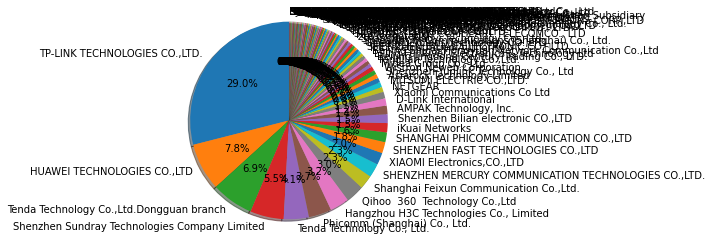

In [209]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Vendor_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()